In [27]:
import pandas as pd
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [29]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [30]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [31]:
df.shape

(215, 15)

In [32]:
df.select_dtypes(include='object').nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [33]:
df.drop(columns=['sl_no'], inplace=True)

In [34]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [35]:
df['salary'] = df['salary'].fillna(df['salary'].median())

In [36]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [37]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

gender: [1 0]
ssc_b: [1 0]
hsc_b: [1 0]
hsc_s: [1 2 0]
degree_t: [2 0 1]
workex: [0 1]
specialisation: [1 0]
status: [1 0]


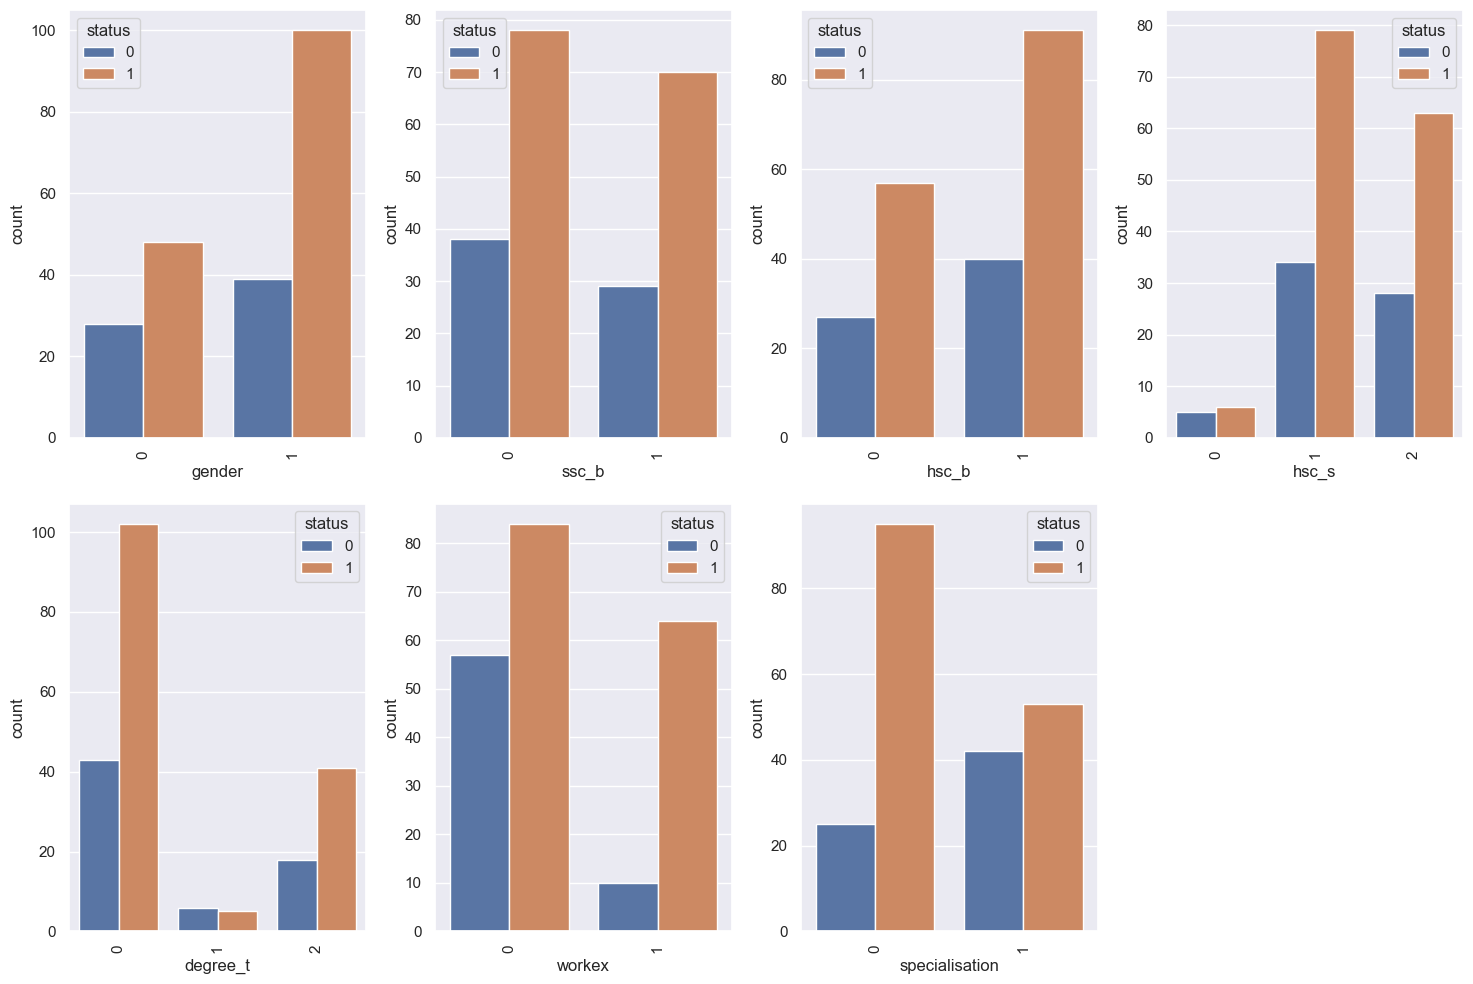

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)# list of categorical variables to plot
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='status', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

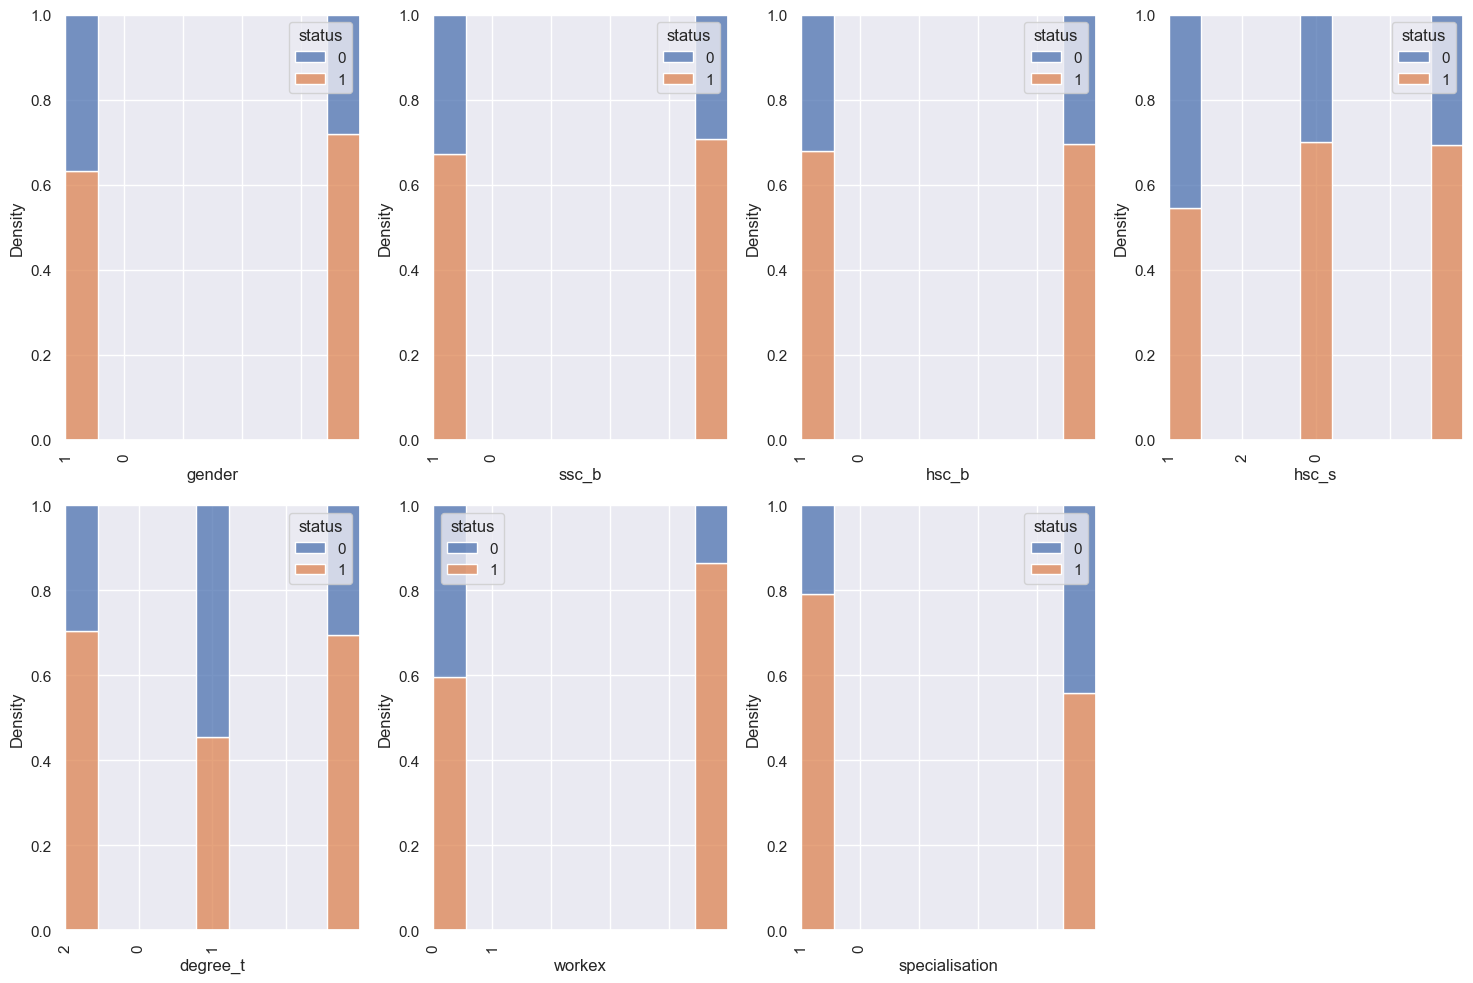

In [39]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='status', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# remove the eighth subplot
fig.delaxes(axs[7])

# show plot
plt.show()

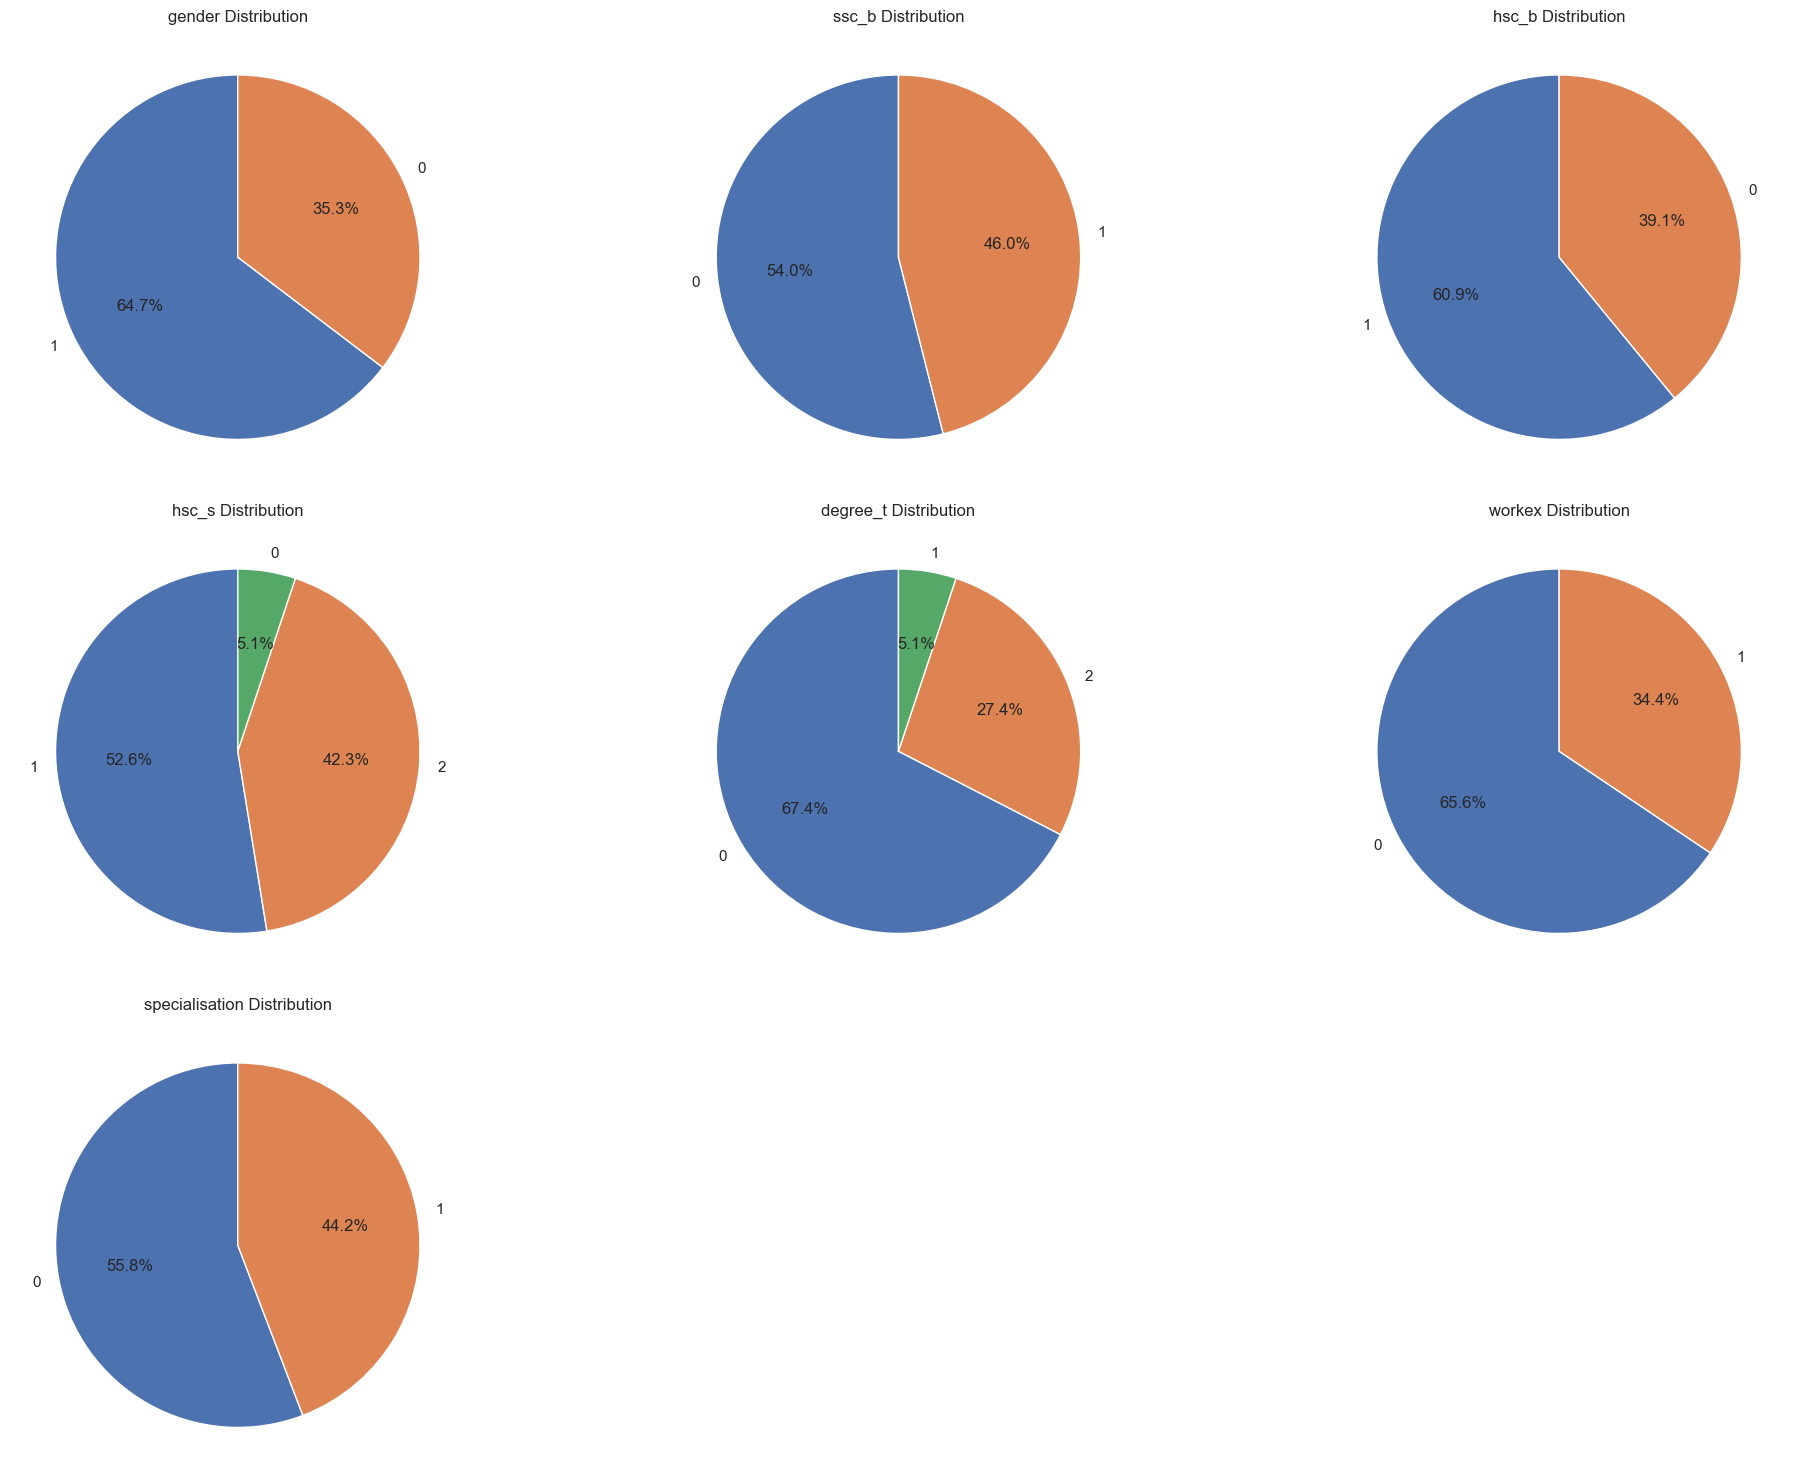

In [40]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# remove the eighth and ninth subplot
fig.delaxes(axs[2, 2])  # 2 represents the row index, and 2 represents the column index
fig.delaxes(axs[2, 1])  # 2 represents the row index, and 1 represents the column index

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

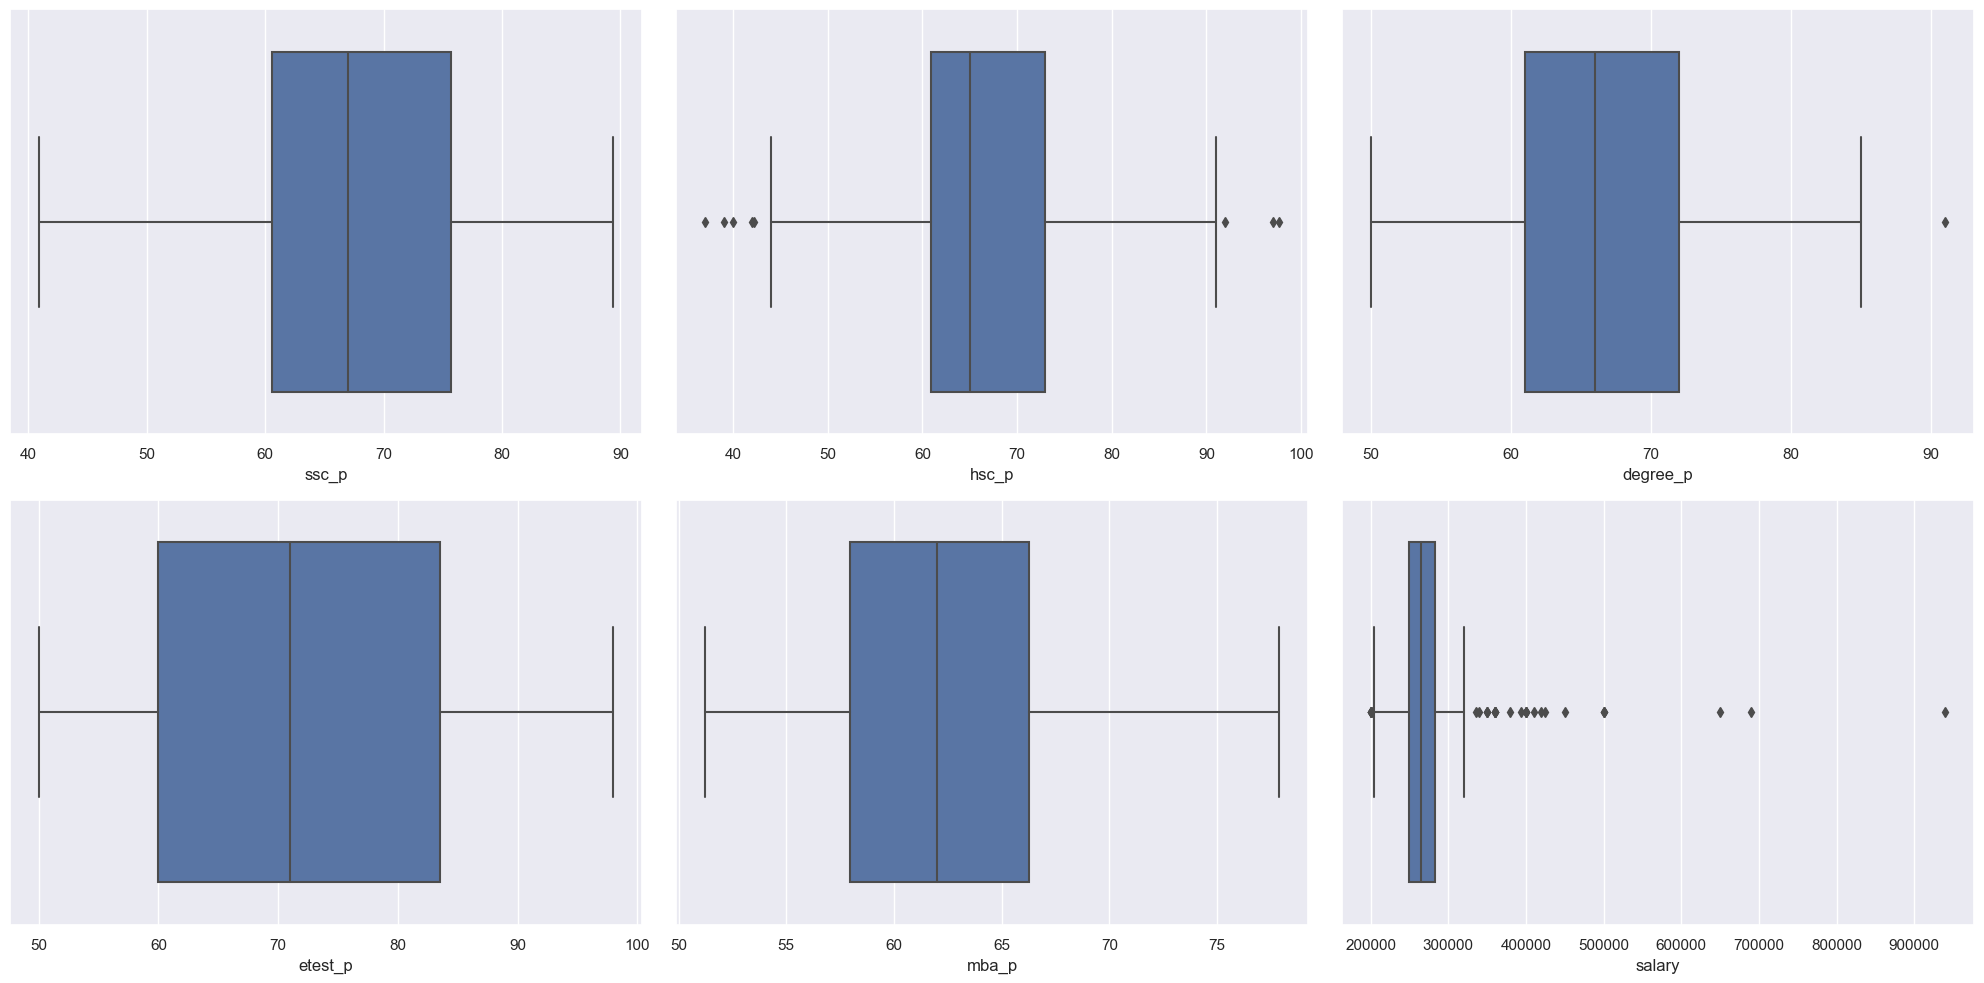

In [41]:
num_vars = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
            'mba_p','salary']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

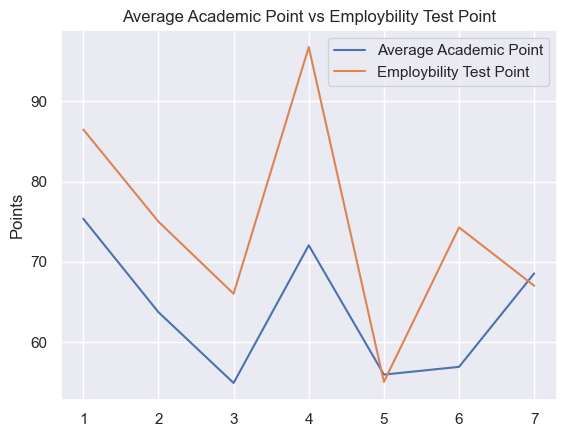

In [42]:
df['avg_p']=(df.ssc_p+df.hsc_p+df.degree_p+df.mba_p)/4
p=df[['avg_p','etest_p']]
plt.title("Average Academic Point vs Employbility Test Point")
plt.plot(p.avg_p.iloc[1:8],label='Average Academic Point')
plt.ylabel("Points")
plt.plot(p.etest_p.iloc[1:8],label='Employbility Test Point')
plt.legend()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int32  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    int32  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int32  
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int32  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int32  
 13  salary          215 non-null    float64
 14  avg_p           215 non-null    float64
dtypes: float64(7), int32(8)
memory usage: 18.6 KB


<Axes: >

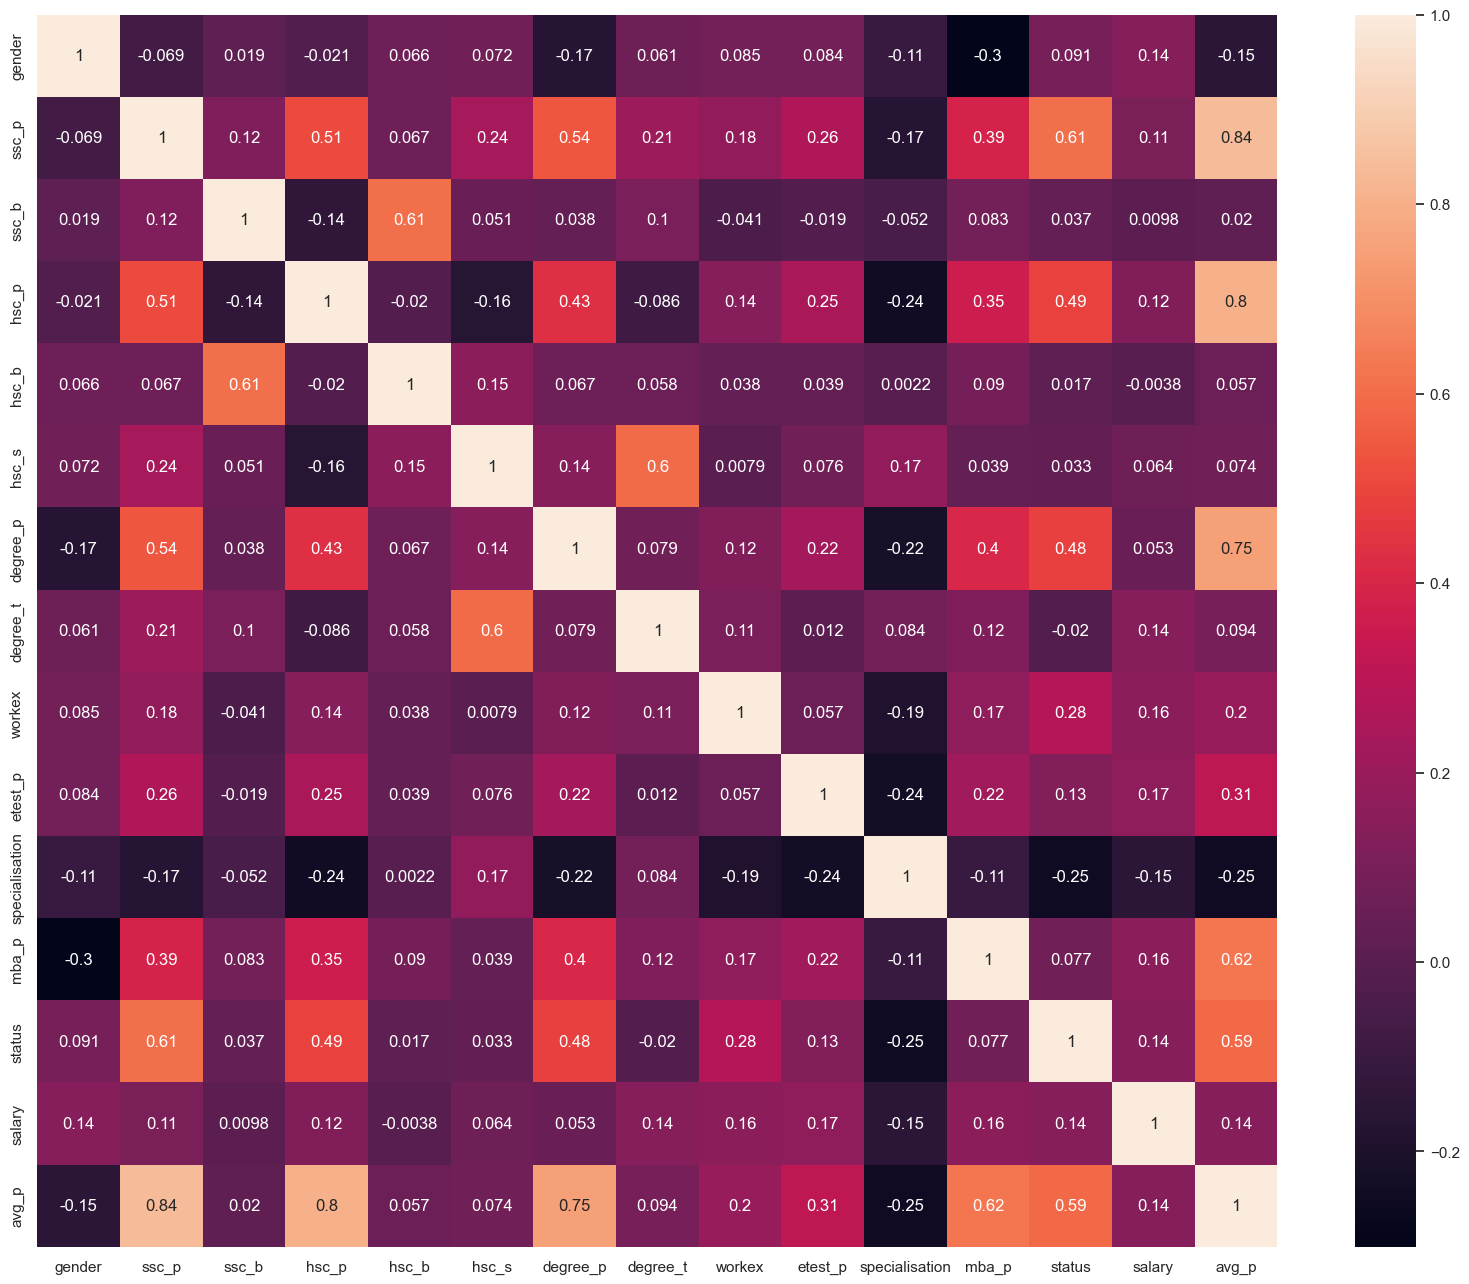

In [44]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [45]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop(columns=['status','avg_p'], axis=1)
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['hsc_p', 'degree_p', 'salary']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [49]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 88.89 %


In [62]:
#input check 
p=[[0,53,0,60,1,2,60,2,0,56,0,53,100000]]
result = dtree.predict(p)
result

array([1])

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.8888888888888888
Precision Score :  0.8888888888888888
Recall Score :  0.8888888888888888
Jaccard Score :  0.8


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8888888888888888')

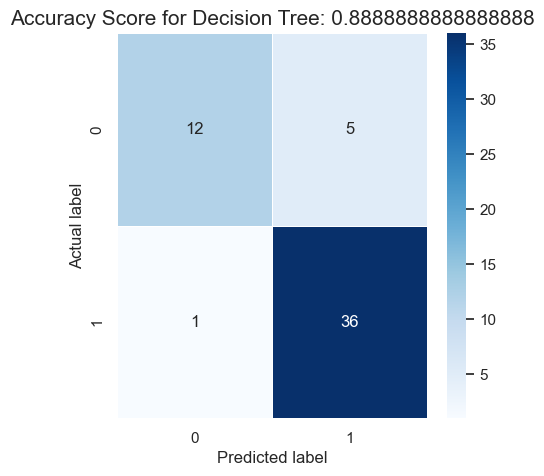

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [55]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.19 %


In [64]:
#input check 
l=[[0,53,0,60,1,2,60,2,0,56,0,53,200000]]
result = rfc.predict(l)
result

array([1])

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8518518518518519
Precision Score :  0.8518518518518519
Recall Score :  0.8518518518518519
Jaccard Score :  0.7419354838709677
Log Loss :  5.33980050209143


In [58]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, predictions)
# print("Accuracy:", 1 - mse)